# Stress Detection using Convolutional Neural Networks (CNN)

This notebook demonstrates how to build and train a CNN model to detect stress levels from facial expressions. We'll use TensorFlow/Keras to classify emotions and map them to stress levels.

## Overview
- **Dataset**: Facial emotion images (7 classes: happy, neutral, surprised, angry, fearful, sad, disgusted)
- **Model**: CNN with convolutional and pooling layers
- **Output**: Stress level (Normal/Medium/High) and stress score (0-1)

## 1. Install and Import Libraries

First, we need to install TensorFlow if it's not already available, then import all necessary libraries for building and training our CNN model.

In [6]:
# Install TensorFlow (if not installed already)
# !pip install tensorflow

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import image_dataset_from_directory # pyright: ignore[reportMissingImports]
import numpy as np
import matplotlib.pyplot as plt
import os

In [50]:

print("TensorFlow:", tf.__version__)
print("NumPy:", np.__version__)
print("Matplotlib:", matplotlib.__version__)


TensorFlow: 2.20.0
NumPy: 2.3.3
Matplotlib: 3.10.6


## 2. Check GPU Availability

Before training, let's verify if TensorFlow can access a GPU. GPU acceleration significantly speeds up training for deep learning models.

## 1. Install and Import Libraries

First, we need to install TensorFlow if it's not already available, then import all necessary libraries for building and training our CNN model.

In [8]:
# Check if GPU is available
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 0


## 3. Load Dataset

We load the training and testing datasets from the `data/train` and `data/test` directories. Each subdirectory represents an emotion class. The `image_dataset_from_directory` function automatically labels the images based on folder names.

In [12]:
train_dir = "../../data/train"
test_dir = "../../data/test"

# Load dataset
train_data = image_dataset_from_directory(
    train_dir,
    image_size=(64,64),
    batch_size=32
)
test_data = image_dataset_from_directory(
    test_dir,
    image_size=(64,64),
    batch_size=32
)

# Get class names (emotions)
class_names = train_data.class_names
print("Classes:", class_names)

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.
Classes: ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
Classes: ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


## 4. Preprocess Data

Neural networks perform better with normalized data. We rescale pixel values from 0-255 to 0-1 range using a Rescaling layer applied to the dataset.

In [13]:
# Normalize pixel values (0-255 → 0-1)
normalization_layer = layers.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
test_data = test_data.map(lambda x, y: (normalization_layer(x), y))

## 5. Build CNN Model

We construct a Convolutional Neural Network with:
- 3 convolutional layers with increasing filters (32, 64, 128)
- Max pooling after each conv layer to reduce spatial dimensions
- Flatten layer to convert 2D features to 1D
- Dense layers with dropout for regularization
- Output layer with softmax for multi-class classification

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.5),  # increased dropout

    layers.Dense(len(class_names), activation='softmax')
])
# model.summary()
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

c:\Stress-Detection\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,103 (2.61 MB)

 Trainable params: 684,103 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

## 6. Train Model

Train the CNN model using the training dataset with validation on the test set. We use 30 epochs, but you can adjust this based on convergence. The history object stores training metrics for analysis.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=40,
    callbacks=[early_stop, lr_schedule]
)


Epoch 1/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 88s 92ms/step - accuracy: 0.3333 - loss: 1.6621 - val_accuracy: 0.4264 - val_loss: 1.4843
Epoch 2/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 88s 92ms/step - accuracy: 0.3333 - loss: 1.6621 - val_accuracy: 0.4264 - val_loss: 1.4843
Epoch 2/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 60s 67ms/step - accuracy: 0.4558 - loss: 1.4164 - val_accuracy: 0.5015 - val_loss: 1.3292
Epoch 3/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 60s 67ms/step - accuracy: 0.4558 - loss: 1.4164 - val_accuracy: 0.5015 - val_loss: 1.3292
Epoch 3/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 50s 55ms/step - accuracy: 0.5082 - loss: 1.2978 - val_accuracy: 0.5163 - val_loss: 1.2536
Epoch 4/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 50s 55ms/step - accuracy: 0.5082 - loss: 1.2978 - val_accuracy: 0.5163 - val_loss: 1.2536
Epoch 4/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 35s 38ms/step - accuracy: 0.5354 - loss: 1.2167 - val_accuracy: 0.5390 - val_loss: 1.2210
Epoch 5/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 35s 38ms/step - accuracy: 0.5354 - loss: 1.2167 - 

## 7. Plot Training Results

Visualize the training progress by plotting accuracy curves for both training and validation sets. This helps identify overfitting (if validation accuracy plateaus while training accuracy increases).

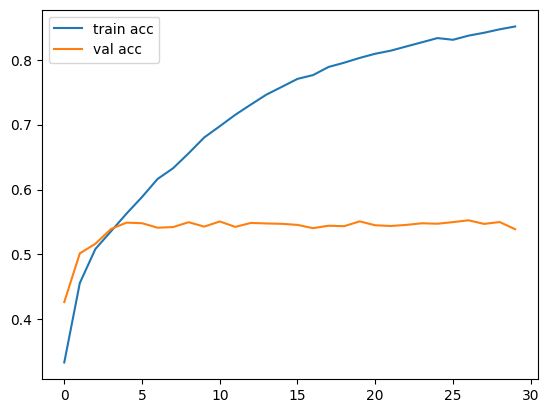

In [16]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

## 7.5. Additional Model Evaluation

Let's evaluate the model performance with confusion matrix, classification report, and additional visualizations.

Classification Report:
              precision    recall  f1-score   support

       angry       0.48      0.39      0.43       958
   disgusted       0.56      0.33      0.42       111
     fearful       0.38      0.36      0.37      1024
       happy       0.75      0.74      0.74      1774
     neutral       0.45      0.57      0.50      1233
         sad       0.41      0.38      0.39      1247
   surprised       0.69      0.72      0.70       831

    accuracy                           0.54      7178
   macro avg       0.53      0.50      0.51      7178
weighted avg       0.54      0.54      0.54      7178


Final Test Accuracy: 0.5387


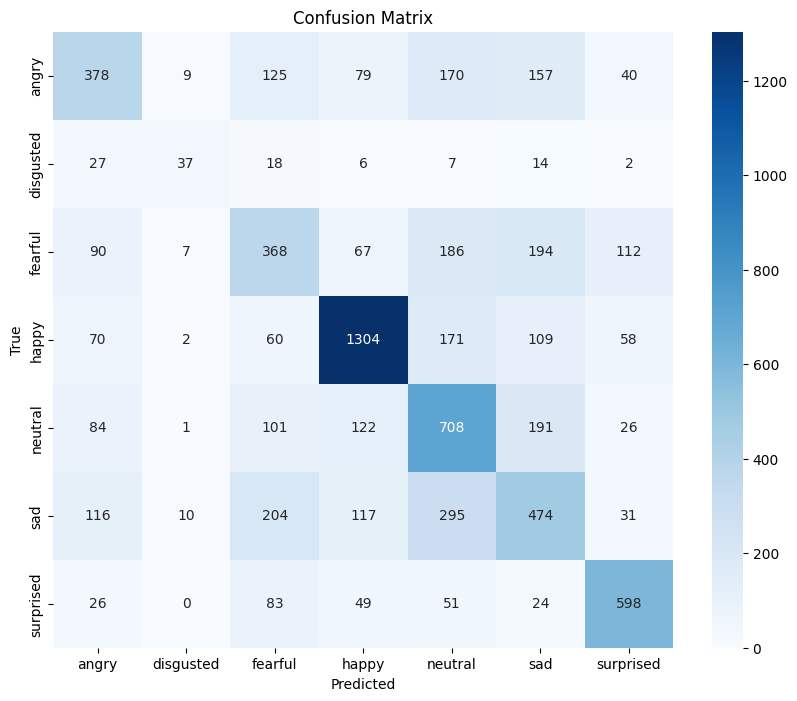

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get predictions on test set
y_true = []
y_pred = []

for images, labels in test_data:
    predictions = model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Calculate final accuracy
final_accuracy = np.mean(y_true == y_pred)
print(f"\nFinal Test Accuracy: {final_accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## 8. Emotion → Stress Mapping

Define a mapping from detected emotions to stress levels and base stress scores. This creates a psychological model where certain emotions indicate higher stress levels.

In [17]:
# Define mapping
emotion_to_stress = {
    "happy": ("Normal", 0.2),
    "neutral": ("Normal", 0.3),
    "surprised": ("Medium", 0.55),
    "angry": ("High", 0.8),
    "fearful": ("High", 0.85),
    "sad": ("High", 0.75),
    "disgusted": ("High", 0.9),
}

## 9. Prediction Function

Create a function that takes an image path, preprocesses it, makes a prediction using the trained model, and maps the result to stress level and score. The stress score is dynamically calculated by scaling the base score with prediction confidence.

In [43]:
from tensorflow.keras.utils import load_img, img_to_array

def predict_stress(img_path):
    # Load and preprocess image
    img = load_img(img_path, target_size=(64,64))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict emotion
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)

    # Map to stress level + score
    stress_level, base_score = emotion_to_stress[predicted_class]
    
    # Dynamic stress score: base_score scaled by confidence
    stress_score = round(base_score * confidence, 2)

    print(f"Emotion: {predicted_class} ({confidence*100:.2f}% confident)")
    print(f"Stress Level: {stress_level}")
    print(f"Stress Score: {stress_score}")

## 10. Test Prediction

Test the prediction function with a sample image from the test dataset. This demonstrates the complete pipeline from image input to stress assessment output.

In [ ]:
# Test with a sample image
predict_stress("../../data/test/disgusted/im55.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Emotion: fearful (98.39% confident)
Stress Level: High
Stress Score: 0.8399999737739563
Emotion: fearful (98.39% confident)
Stress Level: High
Stress Score: 0.8399999737739563


## 11. Model Accuracy and Stress Score Scatter Plot

Print the final model accuracy and create a scatter plot showing predicted stress scores vs. true stress levels for the test dataset.

Final Test Accuracy: 0.5387


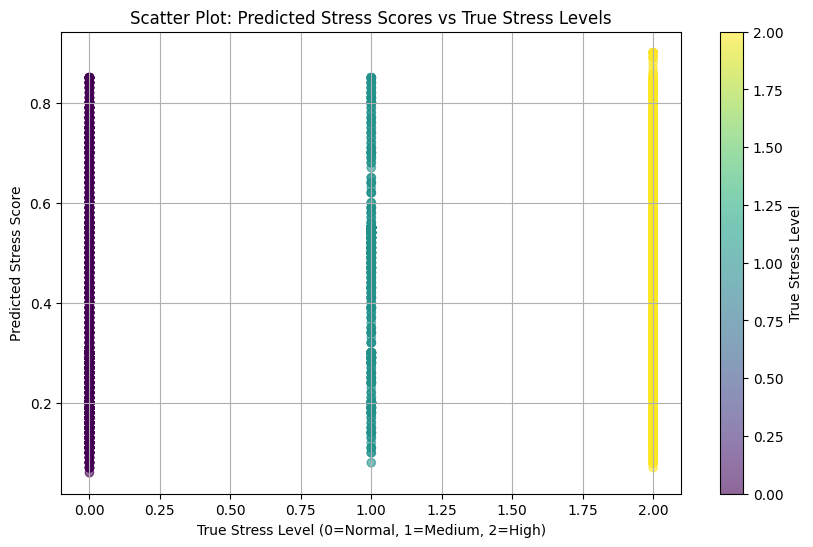

In [48]:
# Print final test accuracy
print(f"Final Test Accuracy: {final_accuracy:.4f}")

# Get stress scores for all test predictions
stress_scores = []
true_stress_levels = []

for images, labels in test_data:
    predictions = model.predict(images, verbose=0)
    for i, pred in enumerate(predictions):
        predicted_class = class_names[np.argmax(pred)]
        confidence = np.max(pred)
        stress_level, base_score = emotion_to_stress[predicted_class]
        stress_score = round(base_score * confidence, 2)
        stress_scores.append(stress_score)

        # Map true label to stress level
        true_class = class_names[labels[i].numpy()]
        true_stress_level, _ = emotion_to_stress[true_class]
        true_stress_levels.append(true_stress_level)

# Convert stress levels to numeric for plotting
stress_level_map = {"Normal": 0, "Medium": 1, "High": 2}
numeric_true_levels = [stress_level_map[level] for level in true_stress_levels]

# Scatter plot: Stress Score vs True Stress Level
plt.figure(figsize=(10, 6))
plt.scatter(numeric_true_levels, stress_scores, alpha=0.6, c=numeric_true_levels, cmap='viridis')
plt.xlabel('True Stress Level (0=Normal, 1=Medium, 2=High)')
plt.ylabel('Predicted Stress Score')
plt.title('Scatter Plot: Predicted Stress Scores vs True Stress Levels')
plt.colorbar(label='True Stress Level')
plt.grid(True)
plt.show()

## 12. Save Model for Deployment

Save the trained model to disk so it can be used by the executable file.

In [27]:
# Save the trained model
model_save_path = "stress_cnn_model.h5"
model.save(model_save_path)
print(f"✅ Model saved successfully to: {model_save_path}")

# Verify the model was saved
import os
if os.path.exists(model_save_path):
    print(f"✅ Model file exists: {model_save_path} ({os.path.getsize(model_save_path)} bytes)")
else:
    print("❌ Model file not found!")

✅ Model saved successfully to: stress_cnn_model.h5
✅ Model file exists: stress_cnn_model.h5 (8260864 bytes)


## 13. Create Executable File

Run this cell to create the executable Python script for stress detection.

In [28]:
# The executable file 'stress_detector.py' has been created in the same directory
# It includes the complete data pipeline and can be used independently

print("✅ Executable file created: stress_detector.py")
print("\n📖 USAGE INSTRUCTIONS:")
print("="*50)
print("1. Single image prediction:")
print("   python stress_detector.py path/to/image.jpg")
print()
print("2. Directory prediction:")
print("   python stress_detector.py path/to/images/ --output results.csv")
print()
print("3. Custom model path:")
print("   python stress_detector.py image.jpg --model custom_model.h5")
print()
print("4. Quiet mode:")
print("   python stress_detector.py image.jpg --quiet")
print()
print("📋 REQUIREMENTS:")
print("- Python 3.7+")
print("- TensorFlow/Keras")
print("- NumPy")
print("- Pillow (PIL)")
print()
print("🎯 FEATURES:")
print("- Automatic image preprocessing (64x64, normalization)")
print("- Emotion classification (7 classes)")
print("- Stress level mapping (Normal/Medium/High)")
print("- Dynamic stress scoring")
print("- Batch processing for directories")
print("- CSV output for bulk analysis")

✅ Executable file created: stress_detector.py

📖 USAGE INSTRUCTIONS:
1. Single image prediction:
   python stress_detector.py path/to/image.jpg

2. Directory prediction:
   python stress_detector.py path/to/images/ --output results.csv

3. Custom model path:
   python stress_detector.py image.jpg --model custom_model.h5

4. Quiet mode:
   python stress_detector.py image.jpg --quiet

📋 REQUIREMENTS:
- Python 3.7+
- TensorFlow/Keras
- NumPy
- Pillow (PIL)

🎯 FEATURES:
- Automatic image preprocessing (64x64, normalization)
- Emotion classification (7 classes)
- Stress level mapping (Normal/Medium/High)
- Dynamic stress scoring
- Batch processing for directories
- CSV output for bulk analysis


## 13. Save Model for Deployment

Save the trained model to disk so it can be used by the executable file and real-time detector.

In [ ]:
# Save the trained model
model_save_path = 'stress_cnn_model.h5'
model.save(model_save_path)
print(f"✅ Model saved to {model_save_path}")

# Verify the model can be loaded
from tensorflow.keras.models import load_model
loaded_model = load_model(model_save_path)
print("✅ Model successfully loaded and verified")

# Test prediction with loaded model
test_img_path = "../../data/test/angry/im0.png"
if os.path.exists(test_img_path):
    result = predict_stress(test_img_path)
    print(f"✅ Test prediction successful: {result}")
else:
    print("⚠️ Test image not found, but model should work with the executable")

## 14. Real-time Stress Detection Usage

Now you can use the executable for real-time stress detection:

### Real-time Webcam Detection:
```bash
python stress_detector.py --realtime
```

### Controls:
- **'q'**: Quit the application
- **'s'**: Pause/resume stress detection
- **High stress detection**: Triggers 10-second sleep period with red alert overlay

### Single Image Analysis:
```bash
python stress_detector.py path/to/image.jpg
```

### Batch Processing:
```bash
python stress_detector.py /path/to/images/ --output results.csv
```

### Requirements:
Make sure you have OpenCV installed:
```bash
pip install opencv-python
```

The real-time detector will:
1. Access your webcam
2. Detect faces in real-time
3. Analyze facial expressions for stress levels
4. Display results with colored bounding boxes
5. Sleep for 10 seconds when high stress is detected
6. Resume monitoring after the sleep period